In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"najlafathi","key":"63a7c6ccd622e3ecfa0bfb8ed7876fe5"}'}

In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600  ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset
!unzip stroke-prediction-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 227MB/s]
Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [4]:
import pandas as pd
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [5]:
print(df.head(),df.columns,df["stroke"].value_counts(normalize=True))



      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1   Index(['id', 'gender', 'age', 'hypertension', 'heart_dis

In [6]:

x=df.drop("stroke", axis=1)
y=df["stroke"]

In [7]:
x.shape

(5110, 11)

In [ ]:
y.shape

(5110,)

In [8]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [9]:
missing_counts=df.isnull().sum()
total_counts=len(df)
missing_percent=(missing_counts/total_counts)*100
print(f"BMI missing percentage: {missing_percent['bmi']:.2f}%")

BMI missing percentage: 3.93%


In [10]:
df["bmi"].isnull().sum()

np.int64(201)

In [11]:
len(df)

5110

In [12]:
df_clean =df.dropna()

In [13]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())
print(df["bmi"])

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64


In [14]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [15]:
df=pd.get_dummies(df,drop_first=True)
df.dtypes

,0
id,int64
age,float64
hypertension,int64
heart_disease,int64
avg_glucose_level,float64
bmi,float64
stroke,int64
gender_Male,bool
gender_Other,bool
ever_married_Yes,bool


In [16]:
print(df.select_dtypes(exclude=["int64","float64","bool"]).columns)

Index([], dtype='object')


In [17]:
df=df.astype(int)

In [18]:
x=df.drop("stroke", axis=1)
y=df["stroke"]

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [21]:
from sklearn.linear_model import LogisticRegression
logi= LogisticRegression(max_iter=1000)
logi.fit(x_train,y_train)
y_pred=logi.predict(x_test)
y_pred_prob=logi.predict_proba(x_test)[0:1]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy", accuracy_score(y_test,y_pred))
print("ClassificationReport" , classification_report(y_test,y_pred))
print("ConfusionMatrix", confusion_matrix(y_test,y_pred))

Accuracy 0.9393346379647749
ClassificationReport               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

ConfusionMatrix [[960   0]
 [ 62   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
X=df.drop('stroke', axis=1)
y=df["stroke"]

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y, random_state=42, test_size=0.2)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_s= scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression(max_iter=2000, class_weight="balanced" , solver="lbfgs")
logi.fit(X_train_s,y_train)
y_pred_prob= logi.predict_proba(X_test_s)[:,1]

In [27]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score, roc_curve
y_pred_prob= logi.predict_proba(X_test_s)[0:,1]
y_pred=(y_pred_prob>= 0.5).astype(int)
print("Classification report",classification_report(y_test, y_pred))
print("Confusion matix",confusion_matrix(y_test, y_pred))
print("Accuracy score",accuracy_score(y_test, y_pred))
print("Roc-auc-score",roc_auc_score(y_test, y_pred_prob))

Classification report               precision    recall  f1-score   support

           0       0.98      0.74      0.84       960
           1       0.17      0.81      0.28        62

    accuracy                           0.74      1022
   macro avg       0.58      0.77      0.56      1022
weighted avg       0.93      0.74      0.81      1022

Confusion matix [[710 250]
 [ 12  50]]
Accuracy score 0.7436399217221135
Roc-auc-score 0.8515120967741935


In [31]:
X=df.drop("stroke", axis=1)
y=df["stroke"]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test= train_test_split(X, y, test_size=0.2 , random_state= 42)


In [ ]:
y_test.shape

(1022,)

In [ ]:
y_test.dtype

dtype('int64')

In [33]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import  accuracy_score ,classification_report,confusion_matrix,roc_auc_score
model_balanced= LogisticRegression(max_iter= 1000 ,class_weight="balanced", solver="liblinear", random_state=42)
model_balanced.fit(X_train, y_train)
y_pred_bal= model_balanced.predict(X_test)
y_pred_prob_bal = model_balanced.predict_proba(X_test)[:,1]
y_pred_prob_bal.shape



(1022,)

In [34]:
print(df["stroke"].value_counts(normalize=True))

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


In [35]:
print("Accuracy score", accuracy_score(y_test,y_pred_bal))
print("Classification Report", classification_report(y_test,y_pred_bal))
print("Confusion matrix",confusion_matrix(y_test,y_pred_bal))
print("ROC AUC", roc_auc_score(y_test,y_pred_prob_bal))

Accuracy score 0.7436399217221135
Classification Report               precision    recall  f1-score   support

           0       0.98      0.74      0.84       960
           1       0.16      0.79      0.27        62

    accuracy                           0.74      1022
   macro avg       0.57      0.77      0.56      1022
weighted avg       0.93      0.74      0.81      1022

Confusion matrix [[711 249]
 [ 13  49]]
ROC AUC 0.8515961021505376


In [36]:
import numpy as np

print(np.unique(y_test))
print(y_test.dtype)
print(np.isnan(y_test).sum())


[0 1]
int64
0


In [37]:
import numpy as np
from sklearn.metrics import precision_recall_curve , roc_auc_score
y_pred_prob_bal=model_balanced.predict_proba(x_test)[:,1]
precisions,recalls, thresholds = precision_recall_curve(y_test, y_pred_prob_bal)
f1_scores=2*(precisions[:-1]*recalls[:-1])/(precisions[:-1]+recalls[:-1])
best_idx=np.argmax(f1_scores)
best_threshold=thresholds[best_idx]
y_pred_opt= (y_pred_prob_bal>= best_threshold).astype(int)

print("confusion matrix", confusion_matrix(y_test, y_pred_opt))
print("classification report", classification_report(y_test, y_pred_opt))
print("accuracy score", accuracy_score(y_test, y_pred_opt))
print("roc auc score", roc_auc_score(y_test, y_pred_prob_bal))


confusion matrix [[958   2]
 [ 62   0]]
classification report               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

accuracy score 0.9373776908023483
roc auc score 0.8515961021505376


/tmp/ipython-input-3822536191.py:5: RuntimeWarning: invalid value encountered in divide
  f1_scores=2*(precisions[:-1]*recalls[:-1])/(precisions[:-1]+recalls[:-1])


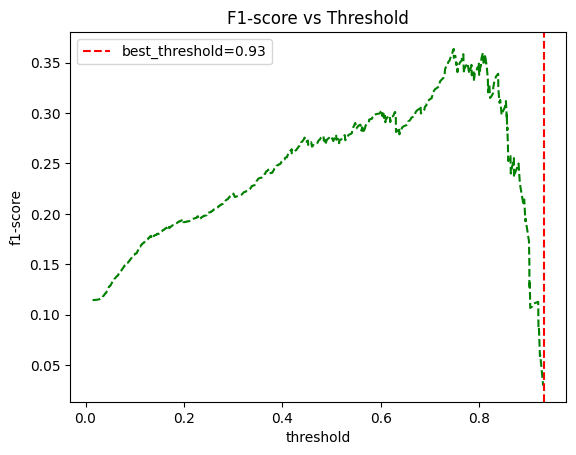

In [38]:
import matplotlib.pyplot as plt
plt.plot(thresholds,f1_scores, color="green", linestyle="--")
plt.axvline(best_threshold, color="red", linestyle="--", label=f"best_threshold={thresholds[best_idx]:.2f}")
plt.xlabel("threshold")
plt.ylabel("f1-score")
plt.title("F1-score vs Threshold")
plt.legend()
plt.show()


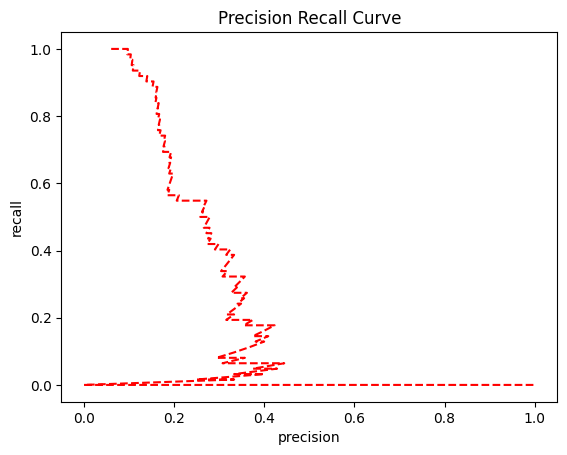

In [39]:
plt.plot(precisions, recalls, color= "red",linestyle="--")
plt.xlabel("precision")
plt.ylabel("recall")
plt.title("Precision Recall Curve")
plt.show()

In [40]:
import numpy as np
import pandas as pd
coefficients= model_balanced.coef_[0]
feature_importance=pd.DataFrame({"feature":X_train.columns, "coefficient":coefficients, "abs_coefficient": np.abs(coefficients)})
feature_importance= feature_importance.sort_values(by="abs_coefficient", ascending=False)
print(feature_importance)

                           feature  coefficient  abs_coefficient
12              work_type_children     1.332941         1.332941
2                     hypertension     0.524736         0.524736
16           smoking_status_smokes     0.270474         0.270474
8                 ever_married_Yes    -0.259774         0.259774
3                    heart_disease     0.245899         0.245899
15     smoking_status_never smoked    -0.230495         0.230495
9           work_type_Never_worked    -0.178074         0.178074
11         work_type_Self-employed    -0.141492         0.141492
10               work_type_Private     0.126076         0.126076
6                      gender_Male    -0.125309         0.125309
1                              age     0.078701         0.078701
13            Residence_type_Urban    -0.067230         0.067230
14  smoking_status_formerly smoked    -0.035373         0.035373
4                avg_glucose_level     0.004248         0.004248
5                        

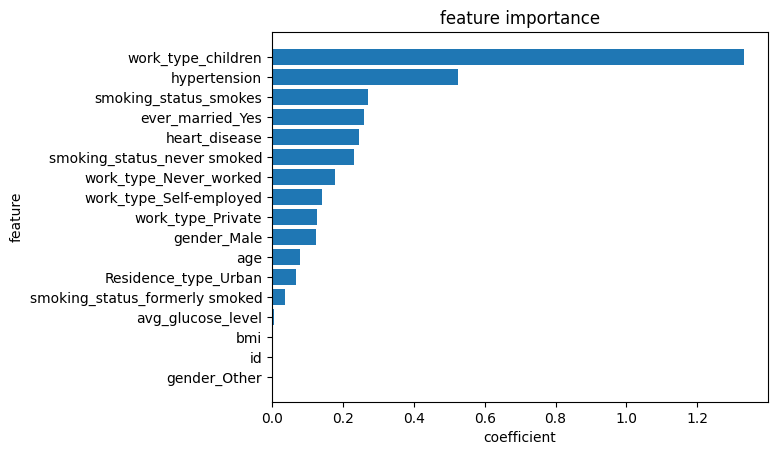

In [41]:
plt.barh(feature_importance["feature"], feature_importance["abs_coefficient"])
plt.gca().invert_yaxis()
plt.xlabel("coefficient")
plt.ylabel("feature")
plt.title("feature importance")
plt.show()

In [42]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
coefficients= model_balanced.coef_[0]
feature_importance=pd.DataFrame({"feature":X_train.columns, "coefficient":coefficients, "abs_coefficient": np.abs(coefficients)})
feature_importance= feature_importance.sort_values(by="abs_coefficient", ascending=False)
top_features=feature_importance.head(10)["feature"].tolist()
X_train_top=X_train[top_features]
X_test_top=X_test[top_features]
print(top_features)

model_tp=LogisticRegression(max_iter=2000,random_state=42, class_weight="balanced")
model_tp.fit(X_train_top, y_train)
y_pred_top =model_tp.predict(X_test_top)
y_pred_top_prob =model_tp.predict_proba(X_test_top)[:,1]
print("Accuracy", accuracy_score(y_test,y_pred_top))
print("ROC AUC", roc_auc_score(y_test,y_pred_top_prob))
print("Confusion matrix",confusion_matrix(y_test,y_pred_top))
print("classification report", classification_report(y_test,y_pred_top))

['work_type_children', 'hypertension', 'smoking_status_smokes', 'ever_married_Yes', 'heart_disease', 'smoking_status_never smoked', 'work_type_Never_worked', 'work_type_Self-employed', 'work_type_Private', 'gender_Male']
Accuracy 0.6418786692759295
ROC AUC 0.779544690860215
Confusion matrix [[606 354]
 [ 12  50]]
classification report               precision    recall  f1-score   support

           0       0.98      0.63      0.77       960
           1       0.12      0.81      0.21        62

    accuracy                           0.64      1022
   macro avg       0.55      0.72      0.49      1022
weighted avg       0.93      0.64      0.73      1022



In [43]:
print("best threshold", best_threshold )

best threshold 0.9327090474849538


In [44]:
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report

probs = y_pred_top_prob
precisions, recalls, thresholds = precision_recall_curve(y_test, probs)
target_recall = 0.8
idx = np.where(recalls[:-1] >= target_recall)[0]
best_threshold_high = thresholds[idx[0]]
y_pred_high = (probs >= best_threshold_high).astype(int)
best_threshold_low = thresholds[idx[-1]]
y_pred_low = (probs >= best_threshold_low).astype(int)
for t, r in zip(thresholds, recalls[:-1]):
    print(f"Threshold: {t:.3f}, Recall: {r:.3f}")
print("All thresholds where recall >= 0.8:")
for i in idx:
    print(f"Index: {i}, Threshold: {thresholds[i]}, Recall: {recalls[i]}")
print("=== High Threshold (idx[0]) ===")
print("Threshold:", best_threshold_high)
print("ROC AUC:", roc_auc_score(y_test, probs))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_high))
print("Classification Report:\n", classification_report(y_test, y_pred_high))
print("Accuracy:", accuracy_score(y_test, y_pred_high))
print("\n")
print("=== Low Threshold (idx[-1]) ===")
print("Threshold:", best_threshold_low)
print("ROC AUC:", roc_auc_score(y_test, probs))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_low))
print("Classification Report:\n", classification_report(y_test, y_pred_low))
print("Accuracy:", accuracy_score(y_test, y_pred_low))
print("\n")

Threshold: 0.061, Recall: 1.000
Threshold: 0.064, Recall: 1.000
Threshold: 0.076, Recall: 1.000
Threshold: 0.081, Recall: 1.000
Threshold: 0.101, Recall: 1.000
Threshold: 0.243, Recall: 1.000
Threshold: 0.254, Recall: 1.000
Threshold: 0.257, Recall: 1.000
Threshold: 0.260, Recall: 1.000
Threshold: 0.263, Recall: 1.000
Threshold: 0.272, Recall: 1.000
Threshold: 0.275, Recall: 1.000
Threshold: 0.291, Recall: 1.000
Threshold: 0.304, Recall: 1.000
Threshold: 0.310, Recall: 1.000
Threshold: 0.324, Recall: 1.000
Threshold: 0.325, Recall: 1.000
Threshold: 0.338, Recall: 1.000
Threshold: 0.342, Recall: 1.000
Threshold: 0.381, Recall: 1.000
Threshold: 0.396, Recall: 1.000
Threshold: 0.420, Recall: 1.000
Threshold: 0.424, Recall: 1.000
Threshold: 0.436, Recall: 1.000
Threshold: 0.439, Recall: 0.952
Threshold: 0.442, Recall: 0.952
Threshold: 0.446, Recall: 0.935
Threshold: 0.458, Recall: 0.919
Threshold: 0.462, Recall: 0.887
Threshold: 0.465, Recall: 0.855
Threshold: 0.482, Recall: 0.855
Threshol

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
best_threshold= thresholds[idx[-1]]
y_pred_best=(y_pred_top_prob>=best_threshold).astype(int)

print("=== Best Threshold (idx[-1]) ===")
print("Threshold:", best_threshold)
print("ROC AUC:", roc_auc_score(y_test,probs ))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))


=== Best Threshold (idx[-1]) ===
Threshold: 0.5043128283850462
ROC AUC: 0.779544690860215
Confusion Matrix:
 [[609 351]
 [ 12  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.63      0.77       960
           1       0.12      0.81      0.22        62

    accuracy                           0.64      1022
   macro avg       0.55      0.72      0.49      1022
weighted avg       0.93      0.64      0.74      1022

Accuracy: 0.6448140900195695


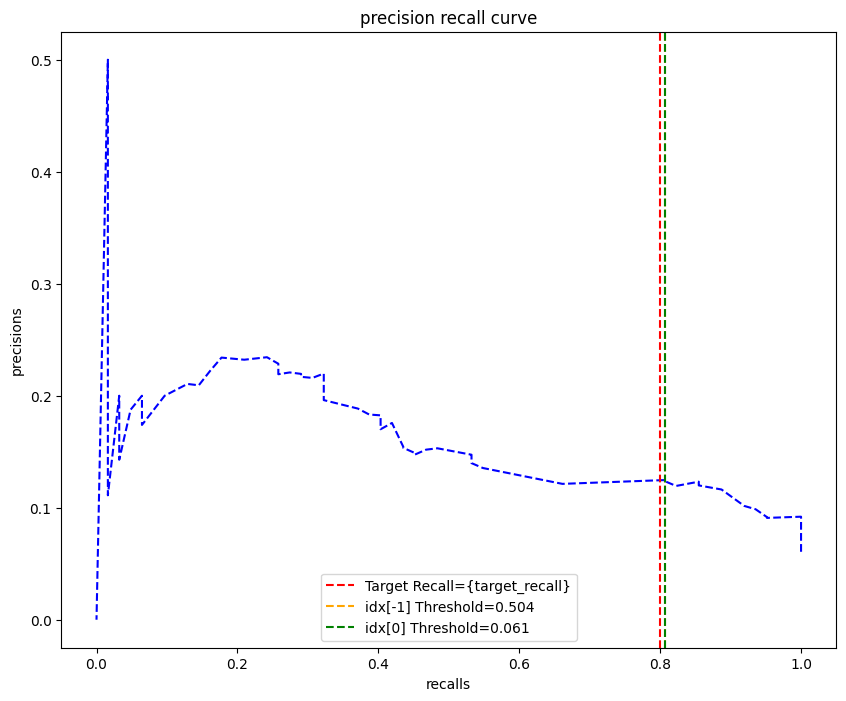

In [46]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precisions, recalls, thresholds=precision_recall_curve(y_test,y_pred_top_prob)
plt.figure(figsize=(10,8))
plt.plot(recalls[:-1], precisions[:-1], color="blue" , linestyle="--")
plt.axvline(x=target_recall, color="red" , linestyle="--", label="Target Recall={target_recall}")
plt.axvline(x=recalls[idx[-1]],color="orange", linestyle="--", label=f"idx[-1] Threshold={thresholds[idx[-1]]:.3f}")
plt.axvline(x=recalls[idx[0-1]],color="green", linestyle="--", label=f"idx[0] Threshold={thresholds[idx[0]]:.3f}")
plt.xlabel("recalls")
plt.ylabel("precisions")
plt.title("precision recall curve")
plt.legend()
plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=42)
param_grid={"n_estimators":[50,100,200], "max_depth":[None,5,10], "min_samples_split":[2,5,10]}
grid_search=GridSearchCV(rf, param_grid, cv=5 , n_jobs=-1, scoring= "roc_auc")
grid_search.fit(X_train_top, y_train)
print("Best Params", grid_search.best_params_)
print("Best score", grid_search.best_score_)

Best Params {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best score 0.7091907595206335


In [48]:
from sklearn.model_selection import GridSearchCV
best_rf=grid_search.best_estimator_
best_rf.fit(X_train_top,y_train)
y_pred_tun =best_rf.predict(X_test_top)
y_pred_tun_prob= best_rf.predict_proba(X_test_top)[:,1]
print("ROC AUC:", roc_auc_score(y_test,y_pred_tun_prob ))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tun))
print("Classification Report:\n", classification_report(y_test,y_pred_tun))
print("Accuracy:", accuracy_score(y_test, y_pred_tun))



ROC AUC: 0.780099126344086
Confusion Matrix:
 [[960   0]
 [ 62   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Accuracy: 0.9393346379647749


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds=precision_recall_curve(y_test,y_pred_tun_prob)
target_recall=0.8
idx= np.where(recalls[:-1]>= target_recall)[0]
best_threshold_tun=thresholds[idx[-1]]
y_tun=(y_pred_tun_prob>= best_threshold_tun).astype(int)
print("ROC AUC:", roc_auc_score(y_test,y_pred_tun_prob ))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_tun))
print("Classification Report:\n", classification_report(y_test,y_tun))
print("Accuracy:", accuracy_score(y_test, y_tun))


ROC AUC: 0.780099126344086
Confusion Matrix:
 [[575 385]
 [ 10  52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.60      0.74       960
           1       0.12      0.84      0.21        62

    accuracy                           0.61      1022
   macro avg       0.55      0.72      0.48      1022
weighted avg       0.93      0.61      0.71      1022

Accuracy: 0.6135029354207436
